# **Create baseline artificial data**

## Import libraries

In [1]:
import sys
import os
## Append parent directory
sys.path.append(os.path.dirname(os.getcwd()))
import matplotlib.pyplot as plt
import numpy as np
from scripts.baseline_data_generation import create_baseline

## Read features

In [ ]:
## 3-ALL
train_features_3_ALL = np.load(r'/data_real/test_features_3_ALL.npy', allow_pickle=True)
print(f"train_features_3_ALL, shape:", train_features_3_ALL.shape)

## 3-SUB 
train_features_3_SUB = np.load(r'/data_real/test_features_3_SUB.npy', allow_pickle=True)
print(f"train_features_3_SUB, shape:", train_features_3_SUB.shape)

## 15-SUB
train_features_15_SUB = np.load(r'/data_real/train_attributes_15_SUB.npy', allow_pickle=True)
print(f"train_features_15_SUB, shape:", train_features_15_SUB.shape)


## Add moderate level of noise

In [ ]:
create_baseline(train_features_3_ALL, feature_name = "train_features_3_ALL", version_name = "moderate", noise_std=15)
create_baseline(train_features_3_SUB, feature_name = "train_features_3_SUB", version_name = "moderate", noise_std=15)
create_baseline(train_features_15_SUB, feature_name = "train_features_15_SUB", version_name = "moderate", noise_std=15)

## Add high level of noise

In [ ]:
create_baseline(train_features_3_ALL, feature_name = "train_features_3_ALL", version_name = "high", noise_std=100)
create_baseline(train_features_3_SUB, feature_name = "train_features_3_SUB", version_name = "high", noise_std=100)
create_baseline(train_features_15_SUB, feature_name = "train_features_15_SUB", version_name = "high", noise_std=100)

## Plot example samples

### Only real + moderate

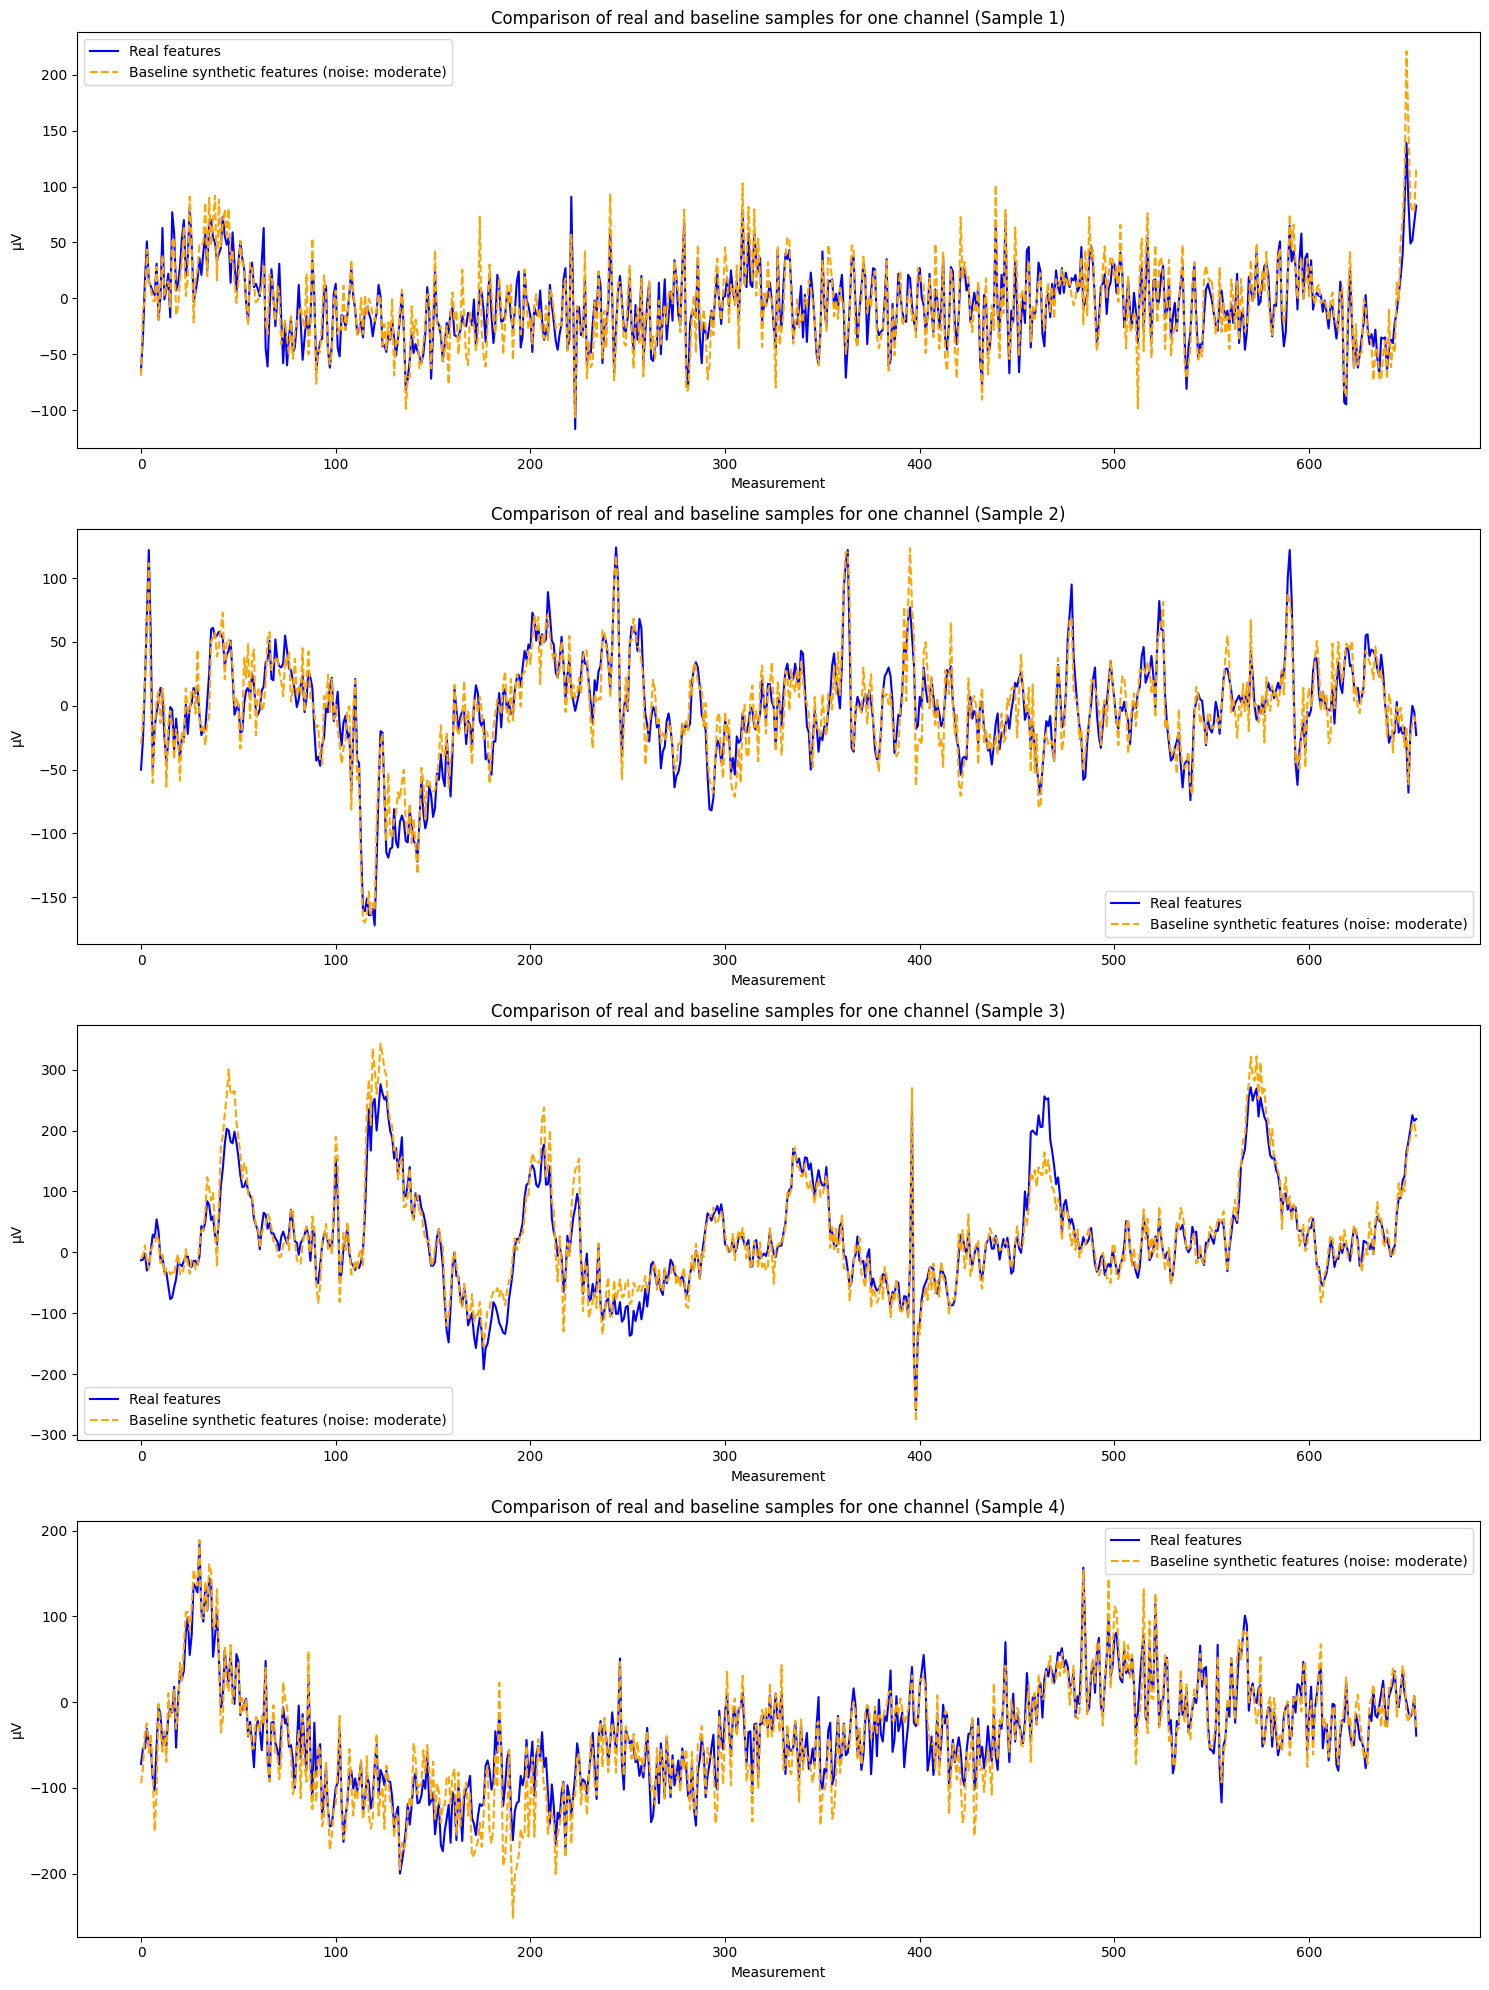

In [5]:
baseline_moderate = np.load(r'/data_synthetic/baseline/train_features_3_ALL_moderate.npy', allow_pickle=True)
real = np.load(r'/data_real/train_features_3_ALL.npy', allow_pickle=True)

baseline_moderate_slices = [
    baseline_moderate[100, :, :1],
    baseline_moderate[300, :, :1],
    baseline_moderate[500, :, :1],
    baseline_moderate[700, :, :1]
]

real_slices = [
    real[100, :, :1],
    real[300, :, :1],
    real[500, :, :1],
    real[700, :, :1]
]

fig, axes = plt.subplots(4, 1, figsize=(15, 20))

for idx in range(4):
    for i in range(real_slices[idx].shape[1]):
        axes[idx].plot(real_slices[idx][:, i], label='Real features', color='blue')

    for i in range(baseline_moderate_slices[idx].shape[1]):
        axes[idx].plot(baseline_moderate_slices[idx][:, i], label='Baseline synthetic features (noise: moderate)', linestyle='--', color='orange')

    axes[idx].set_title(f'Comparison of real and baseline samples for one channel (Sample {idx + 1})')
    axes[idx].set_xlabel('Measurement')
    axes[idx].set_ylabel('μV')
    axes[idx].legend()

plt.tight_layout()
plt.show()


### Real + moderate + high

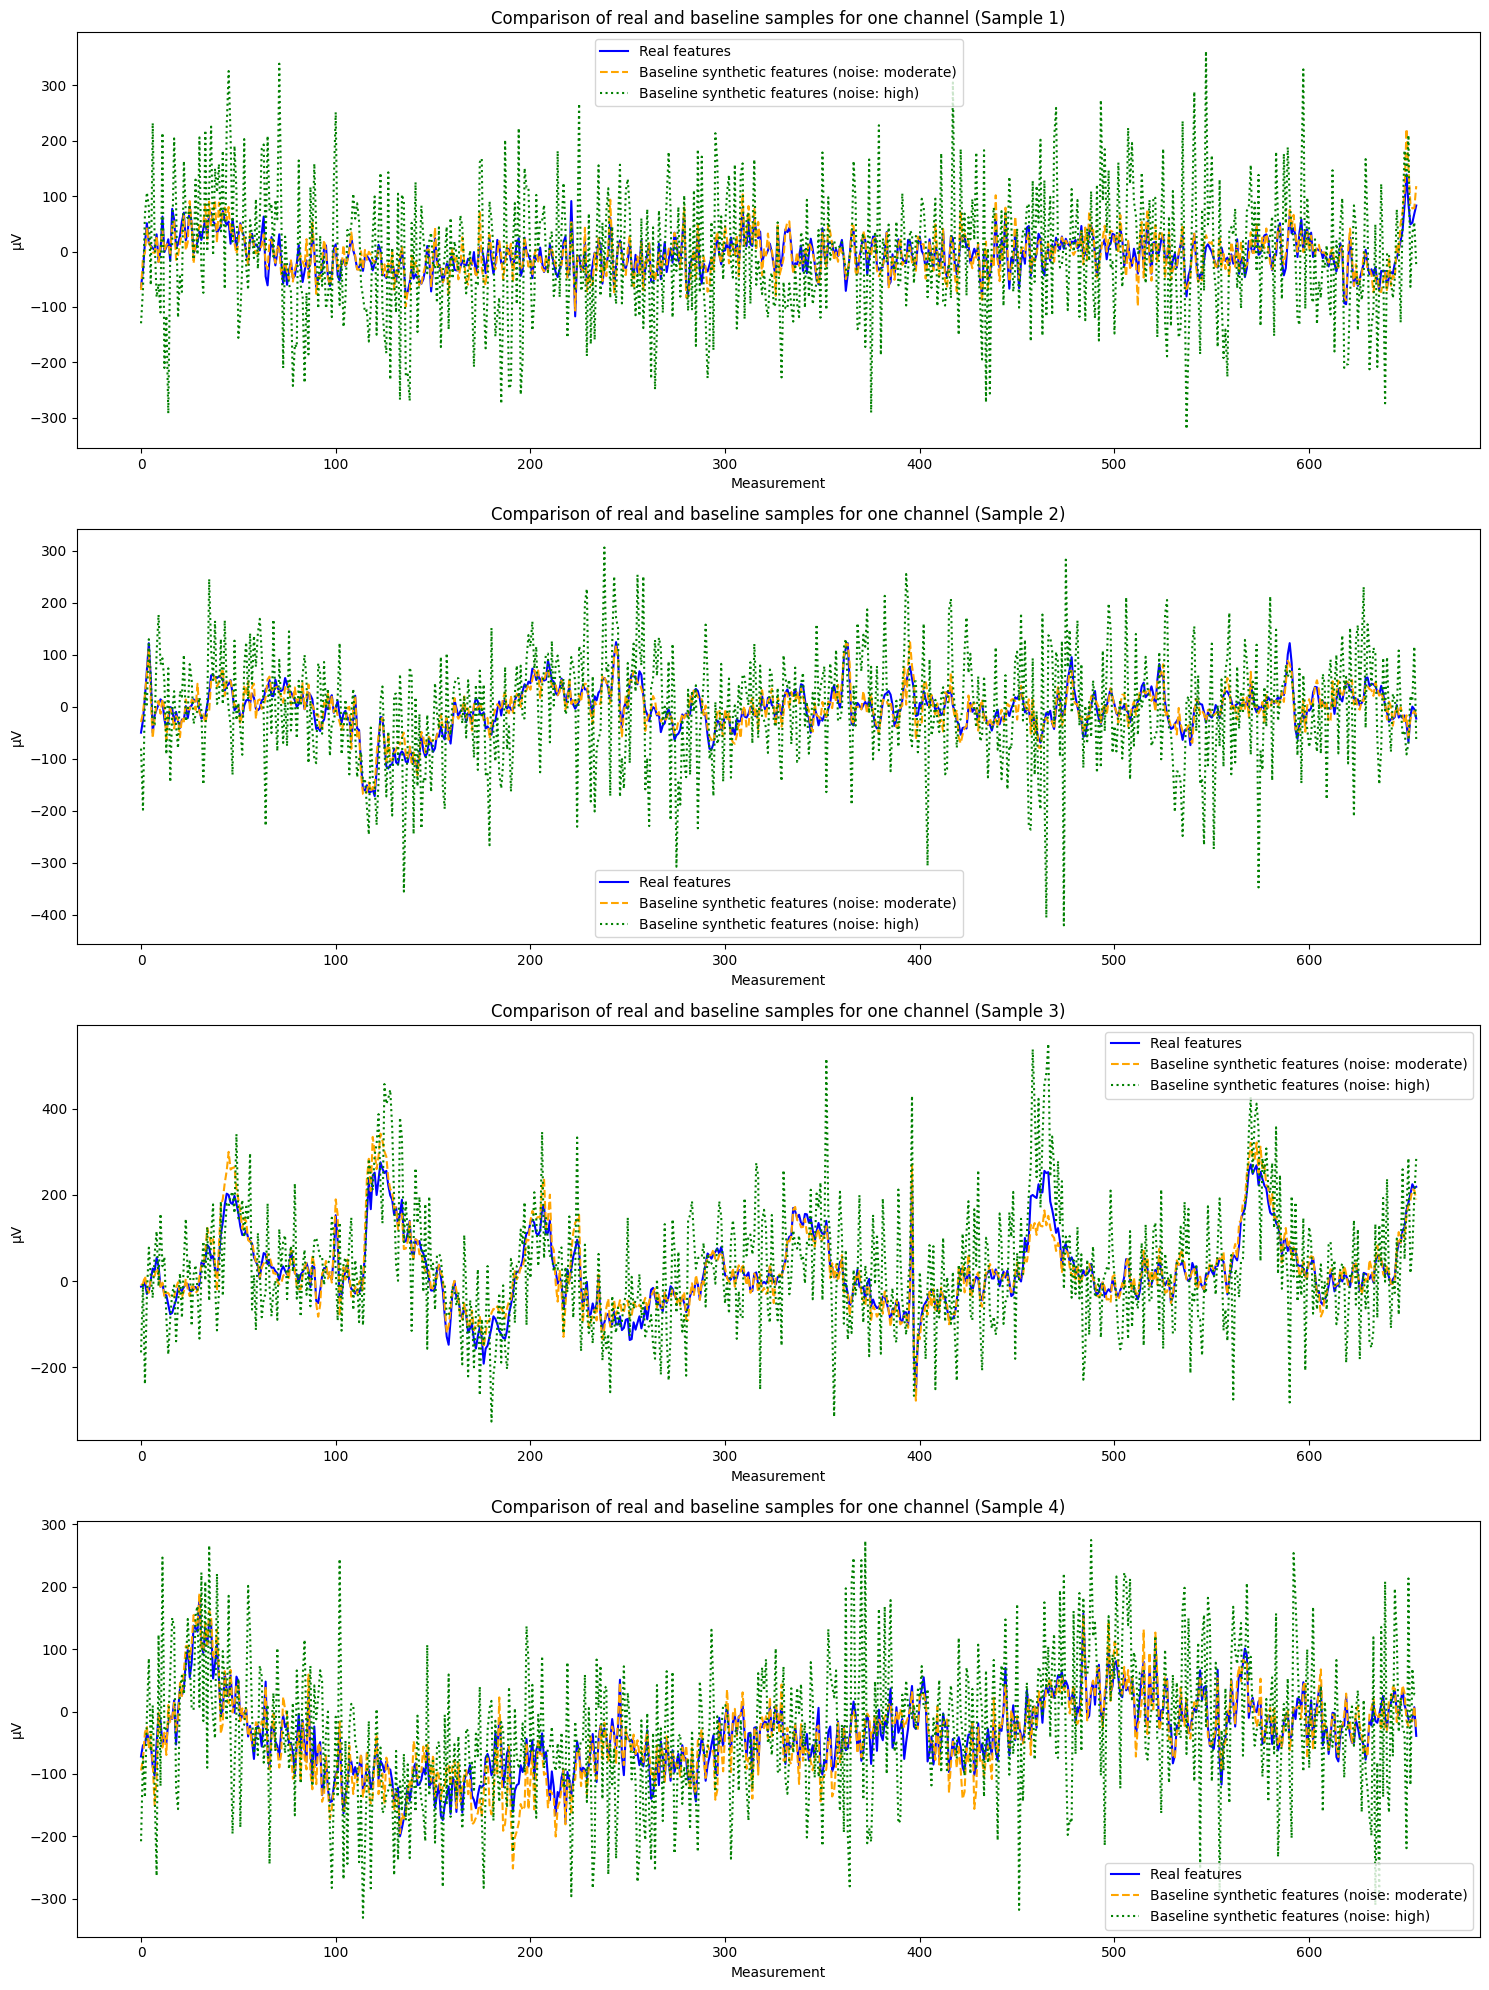

In [6]:
baseline_moderate = np.load(r'/data_synthetic/baseline/train_features_3_ALL_moderate.npy', allow_pickle=True)
baseline_high = np.load(r'/data_synthetic/baseline/train_features_3_ALL_high.npy', allow_pickle=True)
real = np.load(r'/data_real/train_features_3_ALL.npy', allow_pickle=True)

baseline_moderate_slices = [
    baseline_moderate[100, :, :1],
    baseline_moderate[300, :, :1],
    baseline_moderate[500, :, :1],
    baseline_moderate[700, :, :1]
]

baseline_high_slices = [
    baseline_high[100, :, :1],
    baseline_high[300, :, :1],
    baseline_high[500, :, :1],
    baseline_high[700, :, :1]
]

real_slices = [
    real[100, :, :1],
    real[300, :, :1],
    real[500, :, :1],
    real[700, :, :1]
]

fig, axes = plt.subplots(4, 1, figsize=(15, 20))

for idx in range(4):
    for i in range(real_slices[idx].shape[1]):
        axes[idx].plot(real_slices[idx][:, i], label='Real features', color='blue')

    for i in range(baseline_moderate_slices[idx].shape[1]):
        axes[idx].plot(baseline_moderate_slices[idx][:, i], label='Baseline synthetic features (noise: moderate)', linestyle='--', color='orange')

    for i in range(baseline_high_slices[idx].shape[1]):
        axes[idx].plot(baseline_high_slices[idx][:, i], label='Baseline synthetic features (noise: high)', linestyle=':', color='green')

    axes[idx].set_title(f'Comparison of real and baseline samples for one channel (Sample {idx + 1})')
    axes[idx].set_xlabel('Measurement')
    axes[idx].set_ylabel('μV')
    axes[idx].legend()

plt.tight_layout()
plt.show()
